In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df_test = pd.read_csv("dados_titanic/test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [3]:
df_train = pd.read_csv("dados_titanic/train.csv")
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 1. Exploratory Data Analysis

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.1 checking who survived

### 1.1.1 by gender

In [6]:
df_train.groupby(['Sex'])['Survived'].value_counts(normalize = True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

577
314
109
233


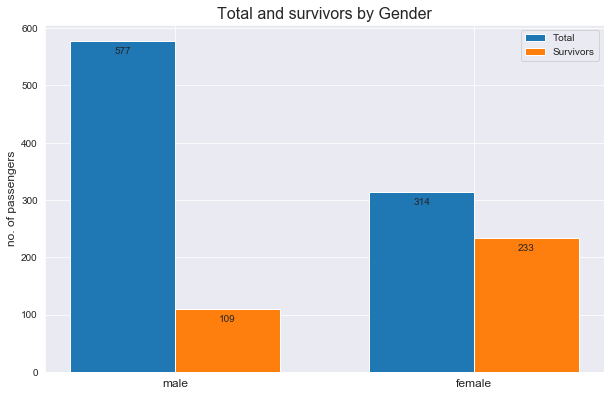

In [7]:
labels = df_train['Sex'].unique()
n_total = df_train['Sex'].value_counts() 
n_surv = df_train[['Sex','Survived']].groupby(['Sex'], as_index = False).sum().sort_values(by='Survived', ascending=True)['Survived']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, n_total, width, label='Total')
rects2 = ax.bar(x + width/2, n_surv, width, label='Survivors')

ax.set_ylabel('no. of passengers', fontsize = 12)
ax.set_title('Total and survivors by Gender', fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 12)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height-30),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        print(height)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(9,6)
plt.show()

##### With the data displayed above is clear that women had more chances to survive this tragedy. probably due the "Women and children first" code of conduct. So in this analysis we should also be examining the children's survival rate. 

### 1.1.2 by Ticket class

In [8]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).sum()

,Pclass,Survived
0,1,136
1,2,87
2,3,119


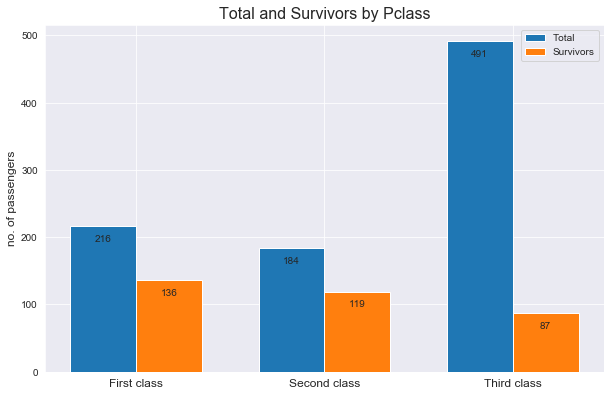

In [9]:
n_total_c1 = df_train.query('Pclass == 1')['Survived'].value_counts().sum()
n_total_c2 = df_train.query('Pclass == 2')['Survived'].value_counts().sum()
n_total_c3 = df_train.query('Pclass == 3')['Survived'].value_counts().sum()


labels = ['First class', 'Second class', 'Third class']
n_total = [n_total_c1, n_total_c2, n_total_c3]
n_surv = df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).sum()['Survived'].sort_values(ascending = False)          

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, n_total, width, label='Total')
rects2 = ax.bar(x + width/2, n_surv, width, label='Survivors')


ax.set_ylabel('no. of passengers', fontsize = 12)
ax.set_title('Total and Survivors by Pclass', fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 12)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height-30),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(9,6)

plt.show()

### 1.1.3 by Embarked (Feature with 2 missing values)

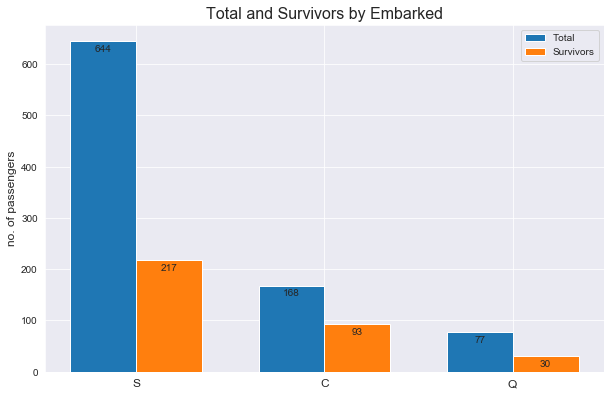

In [10]:
labels = ['S', 'C', 'Q']
n_total = df_train['Embarked'].value_counts()
n_surv = df_train[['Embarked','Survived']].groupby(['Embarked'], sort = False, as_index = True).sum()['Survived']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, n_total, width, label='Total')
rects2 = ax.bar(x + width/2, n_surv, width, label='Survivors')


ax.set_ylabel('no. of passengers', fontsize = 12)
ax.set_title('Total and Survivors by Embarked', fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 12)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height-30),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(9,6)

plt.show()

In [11]:
df_Embarked = df_train[['Embarked','Survived']].groupby(['Embarked'], sort = False, as_index = False).sum()
df_Embarked['Total'] = np.array(df_train['Embarked'].value_counts())
df_Embarked['Survived %'] = (df_Embarked['Survived']/df_Embarked['Total']*100 )
df_Embarked

,Embarked,Survived,Total,Survived %
0,S,217,644,33.695652
1,C,93,168,55.357143
2,Q,30,77,38.961039


####  As we can see, passengers from C (Cherbourg) port had better suvival rate while the ones from S and Q had very similar rates, although there is a big difference in passenger quantity. Lets look from another angle.

<function matplotlib.pyplot.show(*args, **kw)>

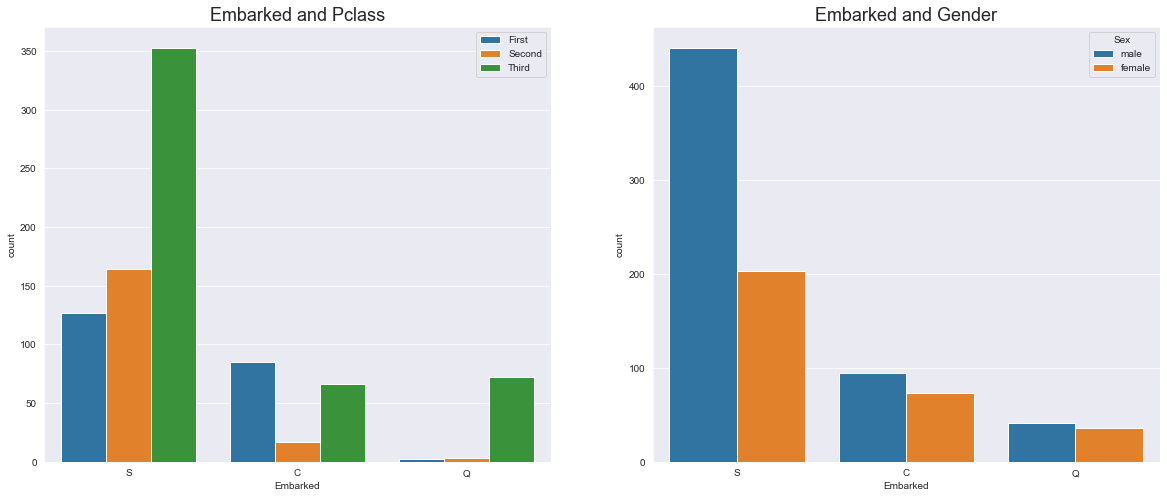

In [12]:
f,ax = plt.subplots(1,2, figsize = (20,8))
sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[0])
ax[0].set_title('Embarked and Pclass', fontsize = 18)
ax[0].legend(['First','Second','Third'])

sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[1])
ax[1].set_title('Embarked and Gender', fontsize = 18)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show

#### Now we can understand that the majority of passengers from C are in the first class, this fact could explain this group's unusual survival rate because we already discovered that passengers in the first class had better survival rate. also notice that there are more first class passengers from port S, but the survival rate of this group wasn't so high, probably due to the ratio of passengers in second and, specialy, third class.

### 1.1.4 by Age (Feature with 177 missing values)

C:\Users\Luan\Anaconda3\envs\alura_pandas\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Luan\Anaconda3\envs\alura_pandas\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0, 0.5, 'Frequency')

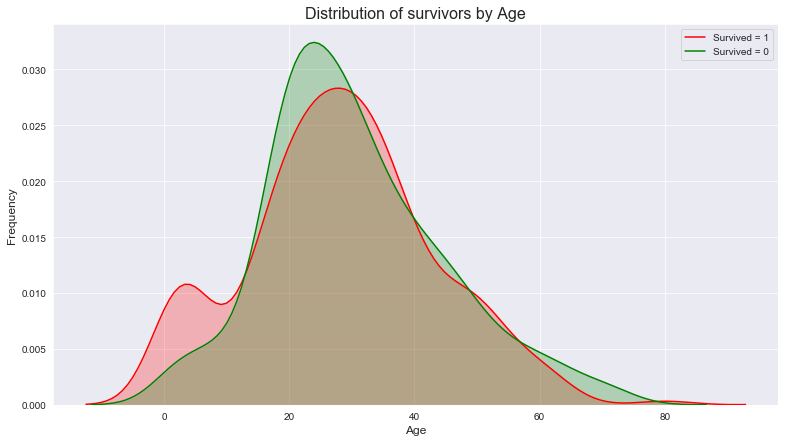

In [13]:
fig = plt.figure(figsize=(13,7),)
ax = sns.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Age'], color = 'r', 
                shade = True, label = 'Survived = 1')
ax = sns.kdeplot(df_train.loc[(df_train['Survived'] == 0),'Age'], color = 'green', 
                shade = True, label = 'Survived = 0')
ax.set_title('Distribution of survivors by Age', fontsize = 16)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

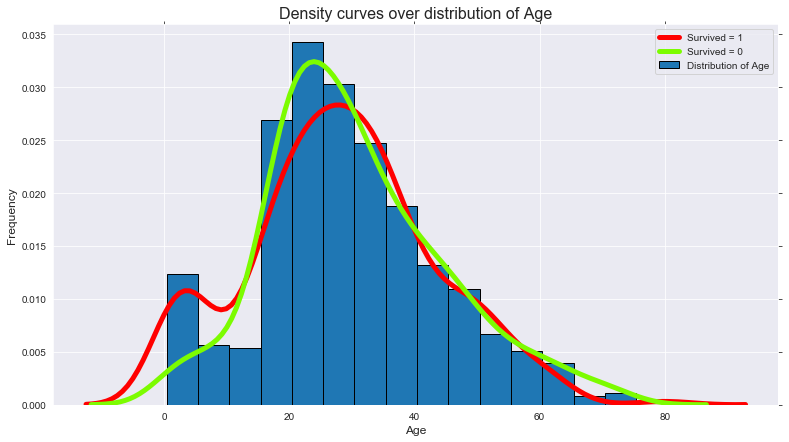

In [14]:
plt.figure(figsize = (13,7))
plt.hist(df_train['Age'], bins = np.arange(df_train['Age'].min(),df_train['Age'].max(),5),
              density = True, edgecolor = 'black')

plt.title('Density curves over distribution of Age', fontsize = 16)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

ax = sns.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Age'], 
               color='r',
               shade=False,
              linewidth=5)

ax = sns.kdeplot(df_train.loc[(df_train['Survived'] == 0),'Age'], 
               color='lawngreen',
               shade=False,
              linewidth=5)

plt.tick_params(top='off', right='off')
plt.legend(['Survived = 1','Survived = 0','Distribution of Age'])
plt.show()



#### As we can see in the charts above, the distribution of "survivors by Age" pretty much follows the distribution of Age itself. One interestig point is that passengers with age from 0 to 15 seems to have better chances. We must remember that this feature still contains missing values, so this behavior can change.

### 1.1.5 by Family size

#### For this exploration lets take a step further into the data analysis pipeline and use a little bit of "Feature Engineering" to create a new feature called "Family", wich will be the sum of other two features: SibSp and Parch.  

In [15]:
df_Family = pd.DataFrame()
df_Family['Family'] = df_train['SibSp'] + df_train['Parch']
df_Family['Survived'] = df_train['Survived']
df_Family.head()

,Family,Survived
0,1,0
1,1,1
2,0,1
3,1,1
4,0,0


In [16]:
df_Family[['Family','Survived']].groupby(['Family'], as_index = False).sum()

,Family,Survived
0,0,163
1,1,89
2,2,59
3,3,21
4,4,3
5,5,3
6,6,4
7,7,0
8,10,0


Text(0.5, 1.0, 'Family by percentage of survivors')

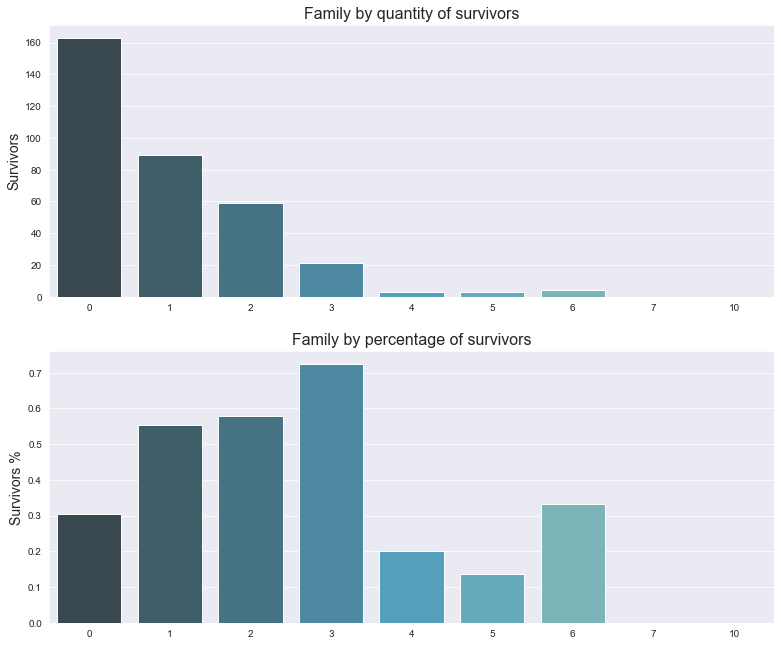

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 11), sharex=False)
ax1 = sns.barplot(x = df_Family['Family'].sort_values().unique(),
                y = df_Family[['Family','Survived']].groupby(['Family'], as_index = False).sum()['Survived'],            
                palette = 'GnBu_d', ax = ax1)
ax1.set_ylabel('Survivors', fontsize = 14)
ax1.set_title('Family by quantity of survivors', fontsize = 16)

ax1 = sns.barplot(x = df_Family['Family'].sort_values().unique(),
                y = df_Family[['Family','Survived']].groupby(['Family'], as_index = False).mean()['Survived'],            
                palette = 'GnBu_d', ax = ax2)
ax2.set_ylabel('Survivors %', fontsize = 14)
ax2.set_title('Family by percentage of survivors', fontsize = 16)

#### so, with these bar plots we can see some interesting facts:
#### 1: No passengers with 7 or more relatives aboard survived.
#### 2: Passengers with 1, 2 or 3 relatives aboard had better survival rates than any other groups, followed by 6 and 0.
#### 3: Using percentages can be crucial to a good understanding of this kind of data. the difference between sample sizes can lead us to a poor understanding of reality. on the other hand, categories with small population can generate bias in the percentage based conclusions.

### 1.2 Checking feature's correlations

In [18]:
df_train[['Survived','Pclass','Parch','Age','Fare']].corr()

,Survived,Pclass,Parch,Age,Fare
Survived,1.000000,-0.338481,0.081629,-0.077221,0.257307
Pclass,-0.338481,1.000000,0.018443,-0.369226,-0.549500
Parch,0.081629,0.018443,1.000000,-0.189119,0.216225
Age,-0.077221,-0.369226,-0.189119,1.000000,0.096067
Fare,0.257307,-0.549500,0.216225,0.096067,1.000000


Text(0.5, 1, 'Heatmap with numeric features + "Pclass"')

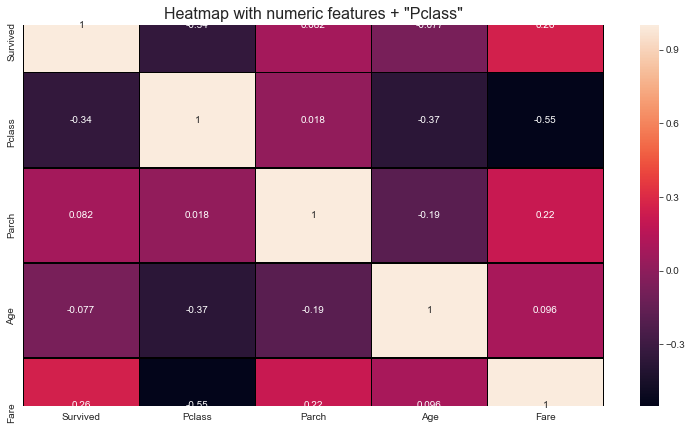

In [19]:
ax = plt.figure(figsize = (13,7))
ax = sns.heatmap(df_train[['Survived','Pclass','Parch','Age','Fare']].corr(), annot = True,
                 linecolor = 'k', linewidths=.5)
ax.set_title('Heatmap with numeric features + "Pclass"', fontsize = 16)

#### As we can see, the numeric features, with the exception of "Fare" and "Pclass", are not strongly correlated, this is good because we wont have problems with data leakage in the M.L. models.
#### Also notice that the strongest correlation is between Pclass and Fare, and it's negative as we could expect since the first class (1) usualy has the highest fares.

# 1.3 Analysing the feature Fare 

Text(0.5, 1.0, 'Distribution of Fare')

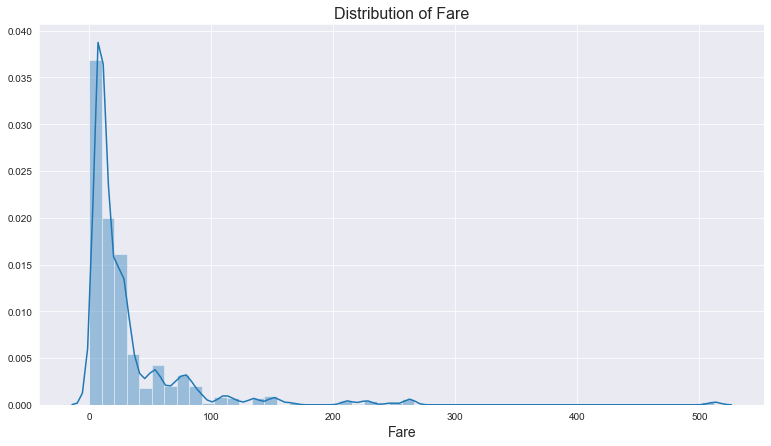

In [20]:
ax = plt.figure(figsize = (13,7))
ax = sns.distplot(df_train['Fare'])
ax.set_xlabel('Fare', fontsize = 14)
ax.set_title('Distribution of Fare', fontsize = 16)

#### Clearly we've got some outliers here. Let's improve this visualization.

Text(0.5, 1.0, 'Distribution of Fare')

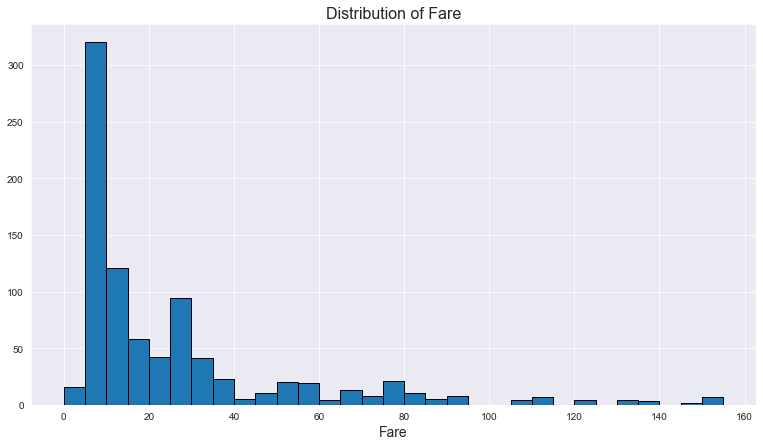

In [21]:
plt.figure(figsize = (13,7))
plt.hist(df_train['Fare'],
         bins = np.arange(df_train['Fare'].min(), 160,5),
         density = False, edgecolor = 'black')
plt.xlabel('Fare', fontsize = 14)
plt.title('Distribution of Fare', fontsize = 16)

#### We still got a right skewed distribution, but now we can observe some interesting points. For exemple: there are "modes" of Fare around 10, 30, 55 and 80 Dollars. Also is clear that the majority of the tickets were sold for fares bellow 60 Dollars.
#### There are also passengers who didn't pay for their tickets.

In [22]:
df_Fare = pd.DataFrame(df_train['Fare'].describe())
df_Fare['Fare_below_500'] = df_train.query('Fare <= 500')['Fare'].describe()
df_Fare['Fare_below_250'] = df_train.query('Fare <= 250')['Fare'].describe()
df_Fare['Fare_below_160'] = df_train.query('Fare <= 160')['Fare'].describe()
df_Fare

,Fare,Fare_below_500,Fare_below_250,Fare_below_160
count,891.000000,888.000000,882.000000,869.000000
mean,32.204208,30.582164,29.002508,26.211789
std,49.693429,41.176366,36.569302,28.623086
min,0.000000,0.000000,0.000000,0.000000
25%,7.910400,7.895800,7.895800,7.895800
50%,14.454200,14.454200,14.454200,13.858300
75%,31.000000,30.771850,30.500000,30.000000
max,512.329200,263.000000,247.520800,153.462500


#### The outliers have strong impact in metrics like mean and standard deviation, although the quartiles remain pretty much the same.
#### Now we see from the numbers that, in fact, 75% ot the tickets were sold for 31 Dollars or less.

#### Now, let's check how this feature is related to the Pclass and Embarked. Boxplots are great to see relations between categorical features, lets explore this power.

Text(0, 0.5, 'Embarked')

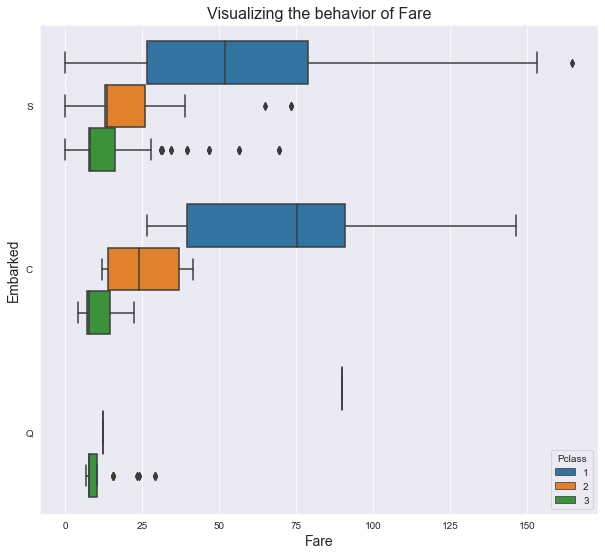

In [23]:
ax = plt.figure(figsize = (10,9))
ax = sns.boxplot(x = 'Fare', y = 'Embarked', hue = 'Pclass', data = df_train.query('Fare <=200')
                 , orient = 'h')
ax.set_title('Visualizing the behavior of Fare',fontsize=16)
ax.set_xlabel('Fare', fontsize = 14)
ax.set_ylabel('Embarked', fontsize = 14)

#### So, there it is. Even without the outliers, first class tickets were way more expensive. But now we can see that the second and specially the third class fares have outliers too.

In [24]:
df_train.query('Fare<=500').groupby(['Pclass'])['Fare'].mean()

Pclass
1    78.124061
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [25]:
df_train['Fare_Surv']=pd.qcut(df_train['Fare'],10)
df_train.groupby(['Fare_Surv'])['Survived'].mean().to_frame().style.background_gradient(cmap='PuBu')

,Survived
Fare_Surv,
"(-0.001, 7.55]",0.141304
"(7.55, 7.854]",0.298851
"(7.854, 8.05]",0.179245
"(8.05, 10.5]",0.230769
"(10.5, 14.454]",0.428571
"(14.454, 21.679]",0.420455
"(21.679, 27.0]",0.516854
"(27.0, 39.688]",0.373626
"(39.688, 77.958]",0.52809


#### Let's finish our feature exploraton with this quantile visualization. so, basicaly, the higher the Fare the higher the survival rate. With few exceptions.

# 1.4 Analysing names and titles.

#### First lets look for the Name feature and see what titles we can find.
#### There they are: Mr, Ms, Miss, Mrs, Mlle, Mme, Master, Dr, Capt, Countess, Don, Dona, Lady, Col, Major, Rev, Sir and Jonkheer are the titles.
#### Now we can create a new Feature called 'Title' and get the titles from the passenger's names, this feature will help us to see the survival rates by a different angle. Also we can notice that the titles can give us important clues about the Age of the passengers.

In [26]:
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [27]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Surv,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.55]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(39.688, 77.958]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.854, 8.05]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(39.688, 77.958]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(7.854, 8.05]",Mr


In [28]:
Title_list = ["Mr", "Ms", "Miss", "Mrs", "Mlle", "Mme", "Master", "Dr", "Capt", "Countess",
 "Don", "Dona", "Lady", "Col", "Major", "Rev", "Sir", "Jonkheer"]
dict_title_surv = {}
dict_title_total = {}

for title in Title_list:
    dict_title_surv[f"{title}"] = ((df_train["Title"] == title) & df_train['Survived'] == 1).sum()
    dict_title_total[f"{title}"] = (df_train["Title"] == title).sum()

In [29]:
dict_title_total

{'Mr': 517,
 'Ms': 1,
 'Miss': 182,
 'Mrs': 125,
 'Mlle': 2,
 'Mme': 1,
 'Master': 40,
 'Dr': 7,
 'Capt': 1,
 'Countess': 1,
 'Don': 1,
 'Dona': 0,
 'Lady': 1,
 'Col': 2,
 'Major': 2,
 'Rev': 6,
 'Sir': 1,
 'Jonkheer': 1}

In [30]:
Title_surv_rates = pd.Series(dict_title_surv) / pd.Series(dict_title_total)
Title_surv_rates

Mr          0.156673
Ms          1.000000
Miss        0.697802
Mrs         0.792000
Mlle        1.000000
Mme         1.000000
Master      0.575000
Dr          0.428571
Capt        0.000000
Countess    1.000000
Don         0.000000
Dona             NaN
Lady        1.000000
Col         0.500000
Major       0.500000
Rev         0.000000
Sir         1.000000
Jonkheer    0.000000
dtype: float64

### Ignoring all low population titles, like major and lady. Miss, Mrs and Master had better survival rates. These titles can be good features for our future ML model. (Some feature like: "Special Group")

# 2.0 Aiming for the ML model

In [31]:
df_train_ml = df_train.copy()

In [32]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare_Surv      891 non-null category
Title          891 non-null object
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 92.3+ KB


## 2.1 Handling the missing values in our key features.

## 2.1.1 "Age"

In [33]:
df_train_ml["Age"].isnull().sum()

177

In [34]:
df_train_ml[["Survived","Age"]].corr()

,Survived,Age
Survived,1.000000,-0.077221
Age,-0.077221,1.000000


### Since we are using age as a feature, lets try to get rid of these "NaN" inputs. We already have segmented the population using titles. Now lets see how much this feature tells us about the age of the passengers.

In [38]:
title_mean_age = df_train_ml.groupby(df_train["Title"])["Age"].mean()


### The code below fills in every missing value in the "Age"  feature with the mean value in every group. The groups are "Title" based.

In [39]:
for title in df_train_ml["Title"]:
    df_train_ml['Age'] = (np.where((df_train_ml.Age.isnull()) & (df_train_ml.Title== title),
                          title_mean_age.loc[f"{title}"], df_train_ml["Age"]))     
df_train_ml["Age"].isnull().sum()

0

## 2.2 Feature Engeneering